#**Лабораторная работа №3. Регрессионный анализ** <br>
Работа выполнена студентом гр. 4217 Мазориевым У.А. <br>
Вариант №10

##**Цель работы**


Изучение алгоритмов и методов регрессии на практике.

##**Ход выполнения работы**

###**Часть 1 - Простая линейная регрессия**

Для начала создается датафрейм с необходимыми данными для линейной регрессии

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import ResidualsPlot
from sklearn.tree import DecisionTreeClassifier
df = pd.DataFrame(data = {'x1': [3,3,6,6,7,8,9], 'x2': [9,8,9,7,4,5,3], 'y': [10.7,11,13.2,12.4,13.2,13.3,14.4]})
df

,x1,x2,y
0,3,9,10.7
1,3,8,11.0
2,6,9,13.2
3,6,7,12.4
4,7,4,13.2
5,8,5,13.3
6,9,3,14.4


Далее полученный датасет делится на тренировочный и валидационный наборы с помощью функции `train_test_split()`.
- `test_size`, `train_size` - необязательные параметры, отвечающие за количество данных в % который пойдут в выборку, в данном примере 25% ушло на валидационный, остальное - на тренировочный.
- `random_state` - отвечает за перемешивание данных, туда педается какое-либо целочисленное значение, при каждом запуске выборка мешается одинаково.
Также инициализируется модель `LinearRegression`, далее применяются параметры:
- `fit` - для обучения модели
- `predict` - для предсказания модели на валидационной выборке
В переменной `predictions_valid` хранятся все предсказанный значения для x_valid

In [ ]:
y = df['y']
x1 = df['x1']

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state=0)

model = LinearRegression()

model.fit(np.array(X_train).reshape(-1,1), y_train)

predictions_valid = model.predict(np.array(X_test).reshape(-1,1))

Далее создается датафрейм для сравнения предсказанных значения и реальных, также оценивается качество алгоритма с помощью различных метрик:
- MSE (Средняя квадратичная ошибка) – среднее значение квадратов ошибок, MSE позволяет оценить, насколько сильно модель отклоняется от истинных значений целевой переменной. Чем меньше значение MSE, тем более точно модель предсказывает значения.


- MAE (Средняя абсолютная ошибка) - Средняя абсолютная ошибка между фактическими и прогнозируемыми значениями.
Если MAE равна 0, это указывает на идеальное соответствие прогнозов реальным значениям.
Чем выше значение MAE, тем больше ошибок в прогнозах модели.

- RMSE (среднеквадратичная ошибка) -  квадратный корень из среднего квадрата ошибок (MSE), в отличие от MSE, масштаб ошибки аналогичен исходным данным, что облегчает интерпретацию.

- R2 (Коэффициент детерминации) -  метрика, которую нужно максимизировать, определяет долю
изменений, обусловленных влиянием признаков на целевую переменную.  Метрика коэффициент детерминации нормализована, то есть не превышает единицу -
удобно сравнивать разные модели

In [ ]:
df_match = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_valid })

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_valid))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_valid))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_valid)))
print('R2 metric:', metrics.r2_score(y_test, predictions_valid))
print('Предсказание:')
print(df_match.reset_index(drop=True))

Mean Absolute Error: 0.5844339622641517
Mean Squared Error: 0.37488652545389883
Root Mean Squared Error: 0.6122797771067561
R2 metric: -0.04135145959416153
Предсказание:
   Actual  Predicted
0    14.4  13.998113
1    13.2  12.433019


- MAE = 0.584 - небольшая, но ощутимая средняя ошибку.
- MSE = 0.375 - более крупные ошибки по сравнению с MAE, поскольку MSE усиливает влияние значительных отклонений, возводя их в квадрат.
- Значение R2 отрицательное, это может указать на слабую линейную зависимость, выбросы, малую выборку данных, необходимость стандартизации и нормализации данных.

После определяются коэффиценты по которым строится линия регрессии, а также визиализируются обучающие, валидационные и предсказанные точки.


Text(0, 0.5, 'Y')

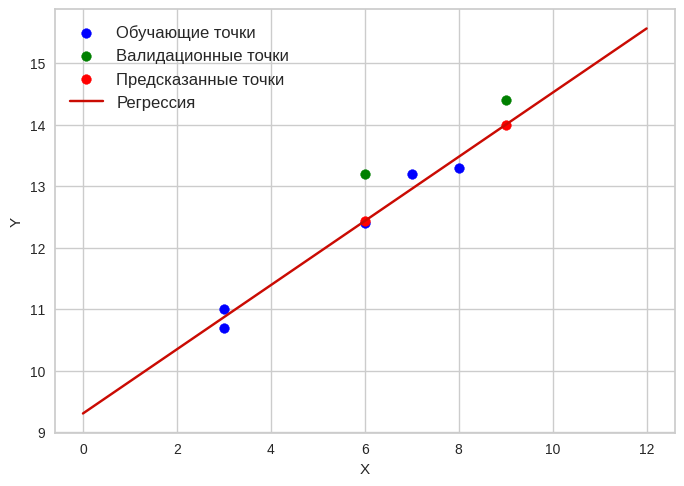

In [ ]:
a = model.coef_
b = model.intercept_

plt.scatter(X_train, y_train, color = 'blue', label = 'Обучающие точки')
plt.scatter(X_test, y_test, color = 'green', label = 'Валидационные точки')
plt.scatter(X_test, predictions_valid, color = 'red', label = 'Предсказанные точки')
plt.plot([0, 12], [a*0 + b, a*12 + b], 'r', label='Регрессия')
plt.legend(fontsize=12)
plt.xlabel('X')
plt.ylabel('Y')

  Далее строится график с разницей предсказанного и истинного значения по каждой точке, чтобы посмотреть на разницы между предсказанными и настоящими значениями.

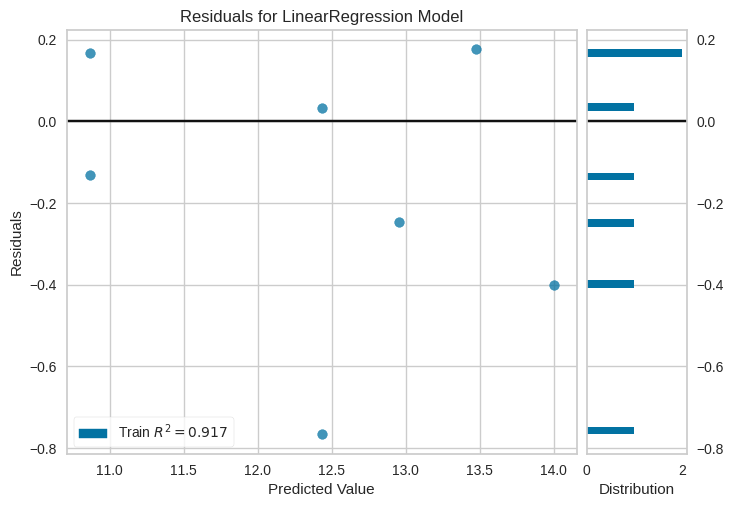

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(model)
visualizer.fit(np.array(x1).reshape(-1,1), y)
visualizer.show()

Разница между предсказанными и настоящими значениями были в основном большие, за исключением некоторых значений. Большие остатки можно было предсказать благодаря показателю R2.

Была построена диаграмма, в которой  проведена прямая, показывающая изначальные значения также на графике были показаны точки, которые показывали предсказанные значения. Чем точка была ближе к красной прямой, тем более точно была предсказана точка к ее истинному значению.


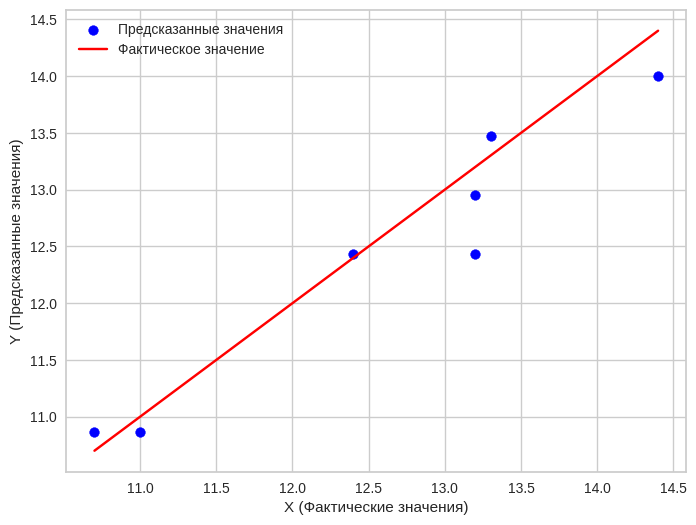

In [ ]:
predictions_valid = model.predict(np.array(x1).reshape(-1,1))
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions_valid, color='blue', label='Предсказанные значения')

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Фактическое значение')

plt.xlabel('X (Фактические значения)')
plt.ylabel('Y (Предсказанные значения)')
plt.legend(loc='upper left')

plt.show()

На основе визуализации данных можно сделать вывод, что  полученная регрессия действительно проходит рядом со значениями точек. Были некоторые значения, которые практически попадали на прямую фактических значений, но также были и значения, далеко находящиеся от данной прямой.

###**Часть 2 - Полиномиальная регрессия**

Для полиномиальной регресии создается датафрейм `df2` где `x` - независимая переменная, а `у` - зависимая.

Далее столбцы `x` и `y` преобразуются в numpy массивы, также применяются метод `reshape(-1,1)`, форма массива меняется в вектор столбцов для применения метода fit модели линейной регрессии.

Степень полинома изменяются циклом от 0 до 5, создается объект `PolynomialFeatures` с степень полинома `i`, данные  `x_p` преобразовываются в полиномиальные признаки указанной степени. Создается массив `X_values` от 0 до 6 с шагом 0.1, значения будут использоваться для построения графика.

Далее применяется полиномиальное преобразование к `X_values`, чтобы использовать его для предсказания и построения графика. Создается модель линейной регрессии, после она обучается с полиномиальными признами `X_poly` и реальными значениями `y_p`. Обученная модель для предсказания значений `Y` по `X_poly_values`.Затем предсказываются значения `Y_pred` для обучающих данных `X_poly`, чтобы оценить качество модели.

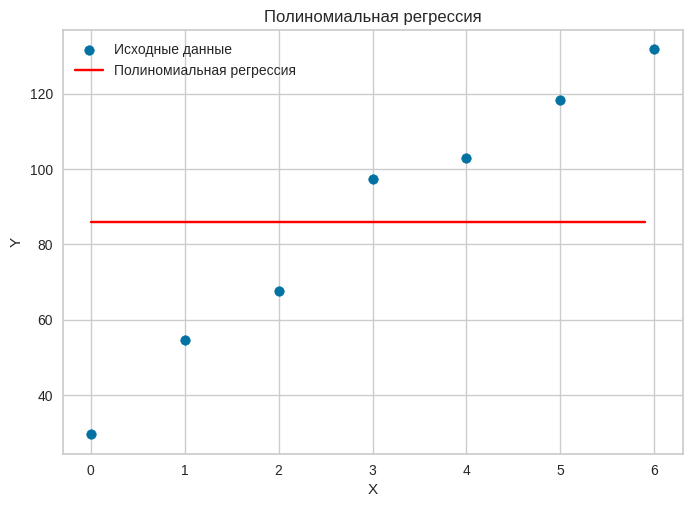

MAE: 30.346938775510203
R2: 0.0


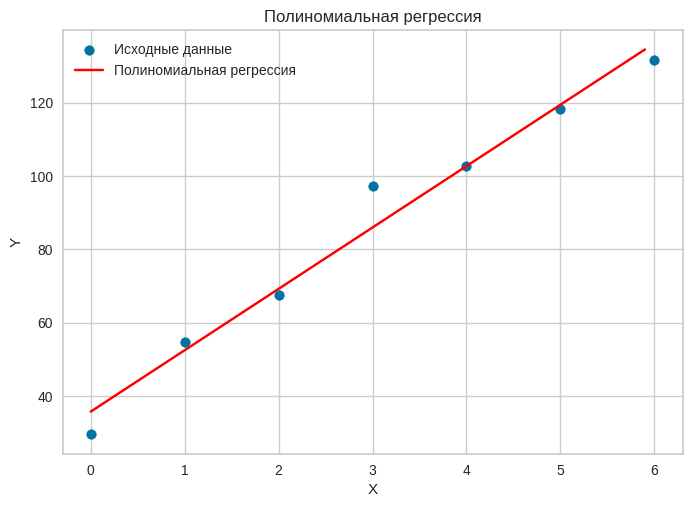

MAE: 3.9234693877551052
R2: 0.9752457772967602


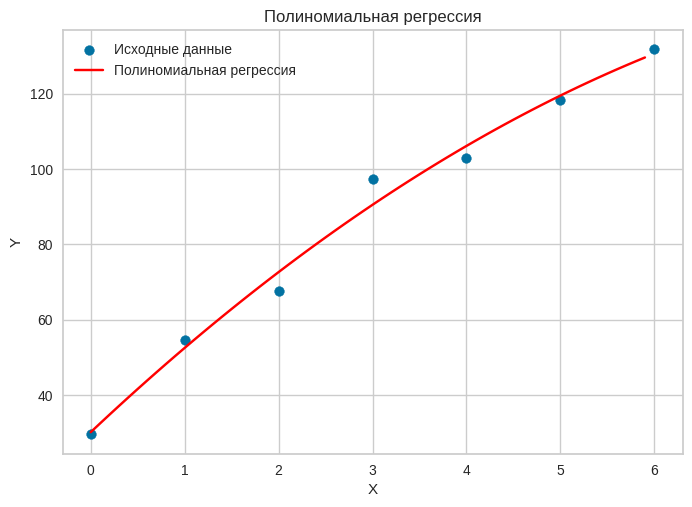

MAE: 2.932653061224482
R2: 0.988449487243178


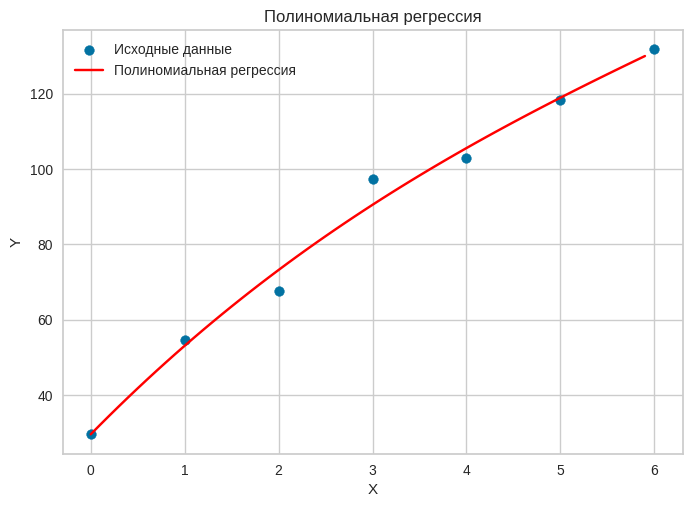

MAE: 2.6088435374149848
R2: 0.9886887737600984


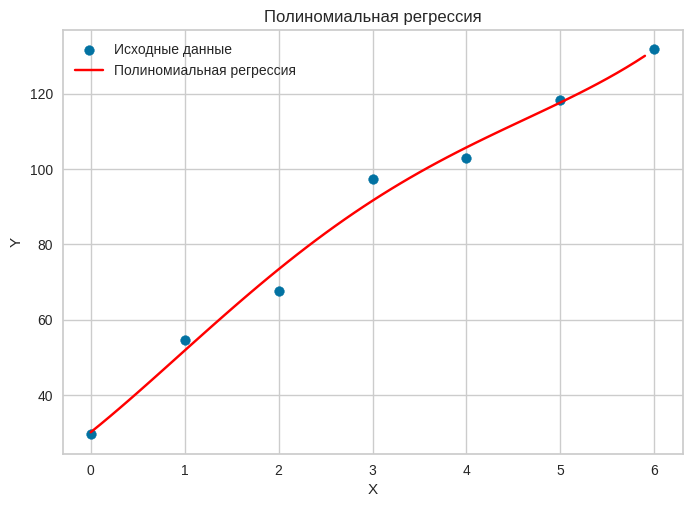

MAE: 2.6692640692637943
R2: 0.9893210501810268


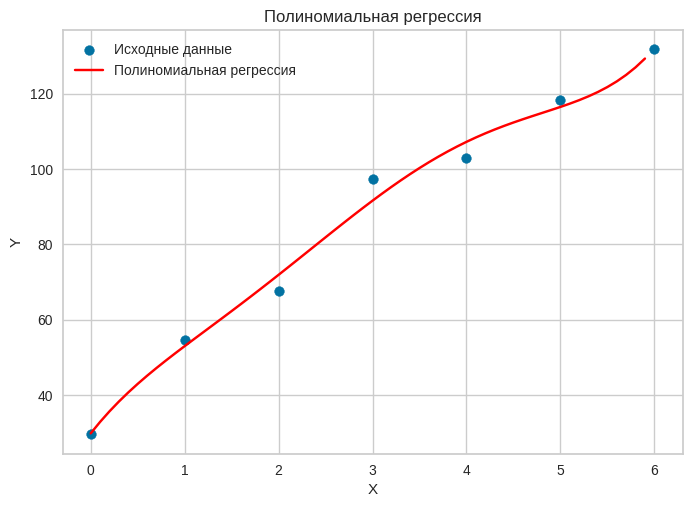

MAE: 2.6686456400713205
R2: 0.9902230911542593


In [ ]:
df2 = pd.DataFrame(data={'x': [0, 1, 2, 3, 4, 5, 6], 'y': [29.5, 54.7,67.5, 97.4, 102.8, 118.2, 131.7]} )
x_p = np.array(df2['x']).reshape(-1, 1)
y_p = np.array(df2['y']).reshape(-1, 1)
for i in range(0,6):
  poly_features = PolynomialFeatures(degree=i)
  X_poly = poly_features.fit_transform(x_p)
  X_values = np.arange(0, 6, 0.1).reshape(-1, 1)

  X_poly_values = poly_features.transform(X_values)
  model_p = LinearRegression()
  model_p.fit(X_poly, y_p)
  Y_pred_graph = model_p.predict(X_poly_values)
  Y_pred = model_p.predict(X_poly)

  plt.scatter(x_p, y_p, label="Исходные данные")

  plt.plot(X_values, Y_pred_graph, color="red", label="Полиномиальная регрессия")

  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Полиномиальная регрессия')
  plt.show()

  print("MAE:", metrics.mean_absolute_error(y_p, Y_pred))
  print("R2:", metrics.r2_score(y_p, Y_pred))


1. MAE - снижается по мере увеличения степени полинома, что указывает на улучшение точности модели. Чем меньше MAE, тем ближе предсказания к фактическим значениям.
2. R² - также увеличивается с ростом степени полинома, приближаясь к 1. Это говорит о том, что модель лучше объясняет вариацию в данных с увеличением степени.

Начиная с полинома третьей степени, прирост R² становится менее значительным, а MAE перестает существенно уменьшаться. Это может свидетельствовать о том, что модель уже достаточно хорошо подстроена под данные, и дальнейшее увеличение степени полинома не принесет существенного улучшения.


На основании вышесказанного, можно сделать вывод, что полиномиальная регрессия третьей степени  оптимальная. Более высокие степени могут привести к переобучению, а добавляемая сложность модели не дает значительных улучшений в точности.

### **Часть 3 - Решение задачи регрессии различными методами**

С помощью библиотеки pandas считывается файл car_price. Данный датафрейм включает в себя информация об авто такие как стоимость машины, марка машины, тип двигателя, пробег по городу и шоссе, мощность в лошадиных силах и многие другие факторы, которые важны для покупки автомобиля. Целевой переменной была выбрана цена, т.к. это является ключевым параметром в покупки любого товара, в т.ч. и автомобиля.

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Создается новый столбец где будет общий пробег автомобиля.



In [ ]:
df3['probeg'] = df3['citympg'] + df3['highwaympg']
df3

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,probeg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,48
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,48
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,45
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,54
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,51
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,44
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,41
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,53


Данные проверяются на наличие явных дубликатов, выведем их количество. После просмотра данных было выявлено, что явных дубликатов нет

In [ ]:
print(df3.duplicated().sum())

0


После данный проверяются на наличие неявных дубликатов. Неявные дубликаты отсутствуют.

In [ ]:
text_columns = df3.select_dtypes(include=['object']).columns
for _ in text_columns:
  display(df3[_].unique())

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

array(['gas', 'diesel'], dtype=object)

array(['std', 'turbo'], dtype=object)

array(['two', 'four'], dtype=object)

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

array(['rwd', 'fwd', '4wd'], dtype=object)

array(['front', 'rear'], dtype=object)

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

Далее для целевой переменной строится гистограмма и boxplot

array([<Axes: title={'center': 'price'}>], dtype=object)

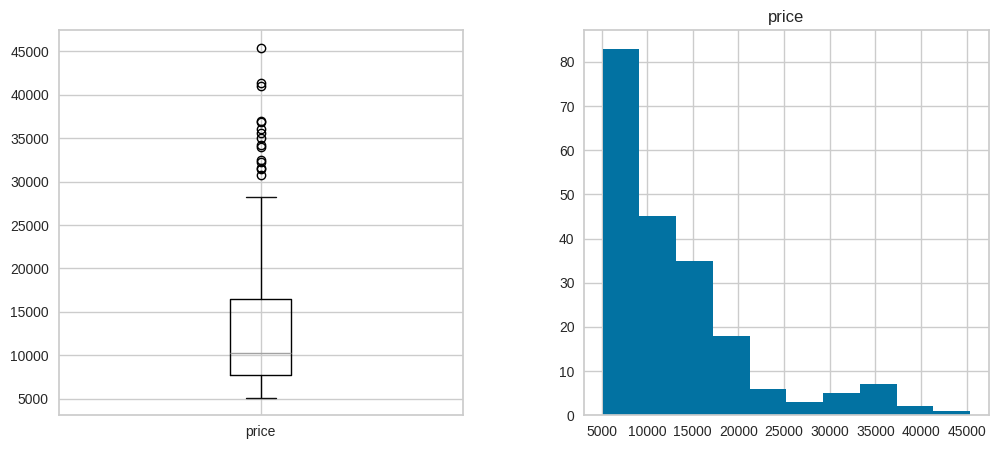

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))
df3.boxplot(column=['price'], ax=axes[0])
df3.hist(column=['price'], ax=axes[1])

Среднее значение по цене было примерно 10500. Однако было несколько записей, где цена было относительно большой (больше 30000). Большинство автомобилей стоят в промежутке  от 5000 до 27500.

Строится диаграмм матриц рассеивания.

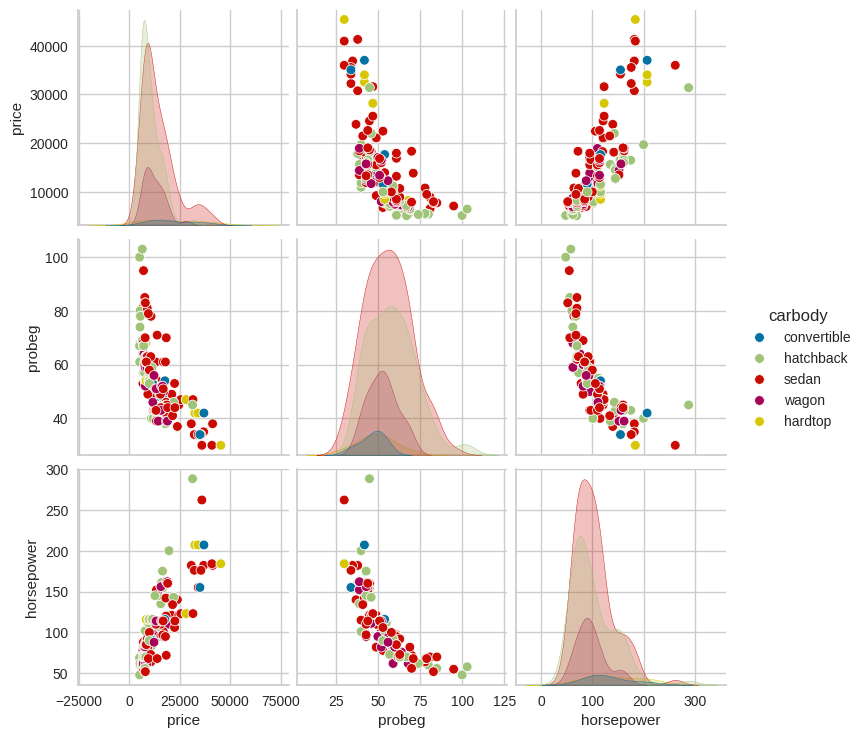

In [ ]:
sns.pairplot(df3[['price', 'probeg', 'horsepower', 'carbody']], hue = 'carbody')

Матрица диаграмм рассеивания показала, что в датафрейме представлен широкий список автомобилей разной цены
- Зависимость мощность лошадиных сил от цены можно назвать линейной, с увелечением цены растет мощность.
- Параметр пробега машины представлен обширным промежутком вне зависимости от цены, можно отметить, что самым распостраненным типами машин будут седан и хэтчбек, это заметно и повседневно в обычной жизни.  

Для обучения модели нужно было преобразовать датафрейм. Для этого нужно было заменить текстовые значения на числовые по типу: для каждого уникального текстового значения присваивалось уникальное числовое значение.
С помощью функции `label_encoder.fit_transform()` датафрейм преобразовывается.

In [ ]:
text_columns = df3.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for _ in text_columns:
  df3[_] = label_encoder.fit_transform(df3[_])
df3

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,probeg
0,1,3,2,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,48
1,2,3,3,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,48
2,3,1,1,1,0,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,45
3,4,2,4,1,0,0,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,54
4,5,2,5,1,0,0,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,51
201,202,-1,138,1,1,0,3,2,0,109.1,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,44
202,203,-1,140,1,0,0,3,2,0,109.1,...,5,3.58,2.87,8.8,134,5500,18,23,21485.0,41
203,204,-1,142,0,1,0,3,2,0,109.1,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,53


Данные последовательно разделяются и обрабатываются для построения и оценки модели линейной регрессии. Для начала данные разделяются на обучающую и временную выборку, далее временная выборка разделяется на валидационную и тестовую выборку, после чего данные нормализируются.

Далее происходит обучени модели с помощью LinearRegression строится модель на нормализованных данных обучающей выборки. Сравниваются реальные и предсказанные значения по четырём метрикам:
- (MAE)
- (MSE)
- (RMSE)
- (R²)


In [ ]:
X = df3.drop(columns=['price'])  # Признаки
y = df3['price']  # Целевая переменная
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2997.8749916365196
Mean Squared Error (MSE): 22452511.92375728
Root Mean Squared Error (RMSE): 4738.408163482466
R-squared (R2): 0.7307813909984129


- Значение MAE составляет примерно 2997. Это означает, что в среднем предсказание цены автомобиля отклоняется от истинного значения на 2997 единиц.
- RMSE составляет примерно 4738. Это значение также отображает среднюю ошибку, но в единицах целевой переменной. Ее значения можно напрямую интерпретировать в контексте цен автомобилей.
- Значение R² равно примерно 0.73, что указывает на то, что модель объясняет 73% вариации в ценах автомобилей. Это довольно хороший показатель для линейной регрессии

Выводится датафрейм  с истинными и предсказанными значениями.

In [ ]:
predictions_df = pd.DataFrame({'Истинные': y_test, 'Предсказанные': y_pred}).reset_index(drop=True)
predictions_df

,Истинные,Предсказанные
0,8358.0,8064.089274
1,18150.0,15053.276770
2,31400.5,22322.939236
3,6849.0,6722.056260
4,15250.0,13172.312382
5,7975.0,8078.279321
6,8916.5,5913.824716
7,22018.0,15355.769448
8,6938.0,5540.732763
9,9995.0,10149.119444


Предсказанные значения и фактические могли сильно отличаться (вплоть до 200%)

Далее с происходит попытки найти лучшие параметры для модели линейной регрессии с помощью GridSearchCV

In [ ]:
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'fit_intercept': True, 'positive': False}


Попытка улучшить работу модели

In [ ]:
model = LinearRegression(fit_intercept=True, positive=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2997.8749916365196
Mean Squared Error (MSE): 22452511.92375728
Root Mean Squared Error (RMSE): 4738.408163482466
R-squared (R2): 0.7307813909984129


Все параметры остались такими же, как и в первой модели. Это объясняется тем, что рекомендуемые параметры оказались параметрами по умолчанию.

Далее создается датафрейм с признаками и коэффициентами, для начала извлекаются кф модели, имена всех признаков кроме price сохраняются в список feature_names, создается датафрейм с двумя столбцами.

Создается новая колонка, для сортировки по модулю, вывод будет осуществляться со знаками кф для более точного анализа.

In [ ]:
coefficients = model.coef_
feature_names = df3.drop(columns=['price']).columns

coef_df = pd.DataFrame({'Признаки': feature_names, 'Коэффициенты': coefficients})

coef_df['|Коэффициенты|'] = coef_df['Коэффициенты'].abs()
coef_df = coef_df.sort_values(by='|Коэффициенты|', ascending=False).drop(columns='|Коэффициенты|').reset_index(drop=True)

print(coef_df)

            Признаки  Коэффициенты
0            CarName  -5552.849799
1             car_ID   4588.035183
2         enginesize   3519.541594
3     enginelocation   2003.015665
4         curbweight   1796.651259
5           carwidth   1343.682115
6             stroke   -871.508768
7     cylindernumber    824.005993
8            peakrpm    779.020728
9          wheelbase    746.095043
10           carbody   -714.429594
11        doornumber   -705.088384
12        aspiration    681.315991
13          fueltype    640.784204
14        drivewheel    639.519302
15        highwaympg    622.371998
16         boreratio   -598.029363
17         carheight    464.993420
18           citympg   -444.527518
19         symboling    393.850926
20  compressionratio    308.769490
21        horsepower   -301.791787
22         carlength   -231.152765
23        enginetype   -161.205410
24            probeg    104.020916
25        fuelsystem    -52.808529


- CarName (-5552.85): Имеет наибольшее отрицательное влияние, что может указывать на то, что определенные марки или модели автомобилей имеют меньшую цену на рынке.
- enginesize (3519.54): Увеличение размера двигателя значительно увеличивает цену, что соответствует ожиданиям на рынке.
- enginelocation (2003.02): Расположение двигателя также положительно сказывается на цене.
- curbweight (1796.65): Более тяжелые автомобили имеют более высокую цену, что может указывать на то, что они воспринимаются как более безопасные или более качественные.
- horsepower (-301.79) имеет отрицательный коэффициент, что может быть неожиданным, поскольку мощность часто ассоциируется с более высокой ценой, но в данном случае может указывать на снижение спроса на более мощные автомобили.

<ipython-input-21-cfcc95922031>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', color='red', lw=2, label='Фактические значения')


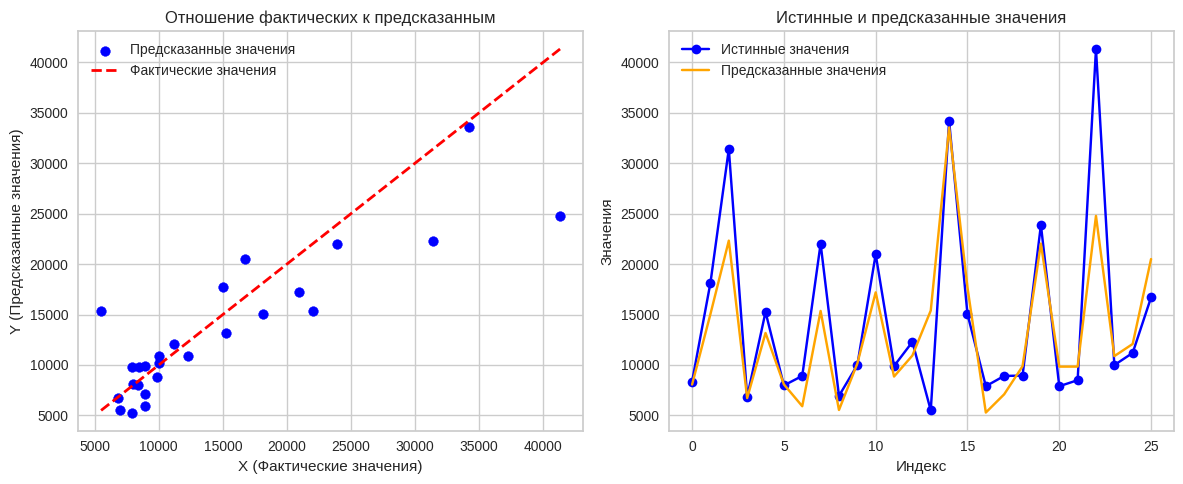

In [ ]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2, figsize=(12, 5))

y_true = y_test
y_pred = model.predict(X_test)

axes[0].scatter(y_true, y_pred, color='blue', label='Предсказанные значения')
axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', color='red', lw=2, label='Фактические значения')

axes[0].set_xlabel('X (Фактические значения)')
axes[0].set_ylabel('Y (Предсказанные значения)')
axes[0].set_title('Отношение фактических к предсказанным')
axes[0].legend(loc='upper left')

predictions_df = pd.DataFrame({'Истинные': y_true, 'Предсказанные': y_pred}).reset_index(drop=True)

axes[1].plot(predictions_df.index, predictions_df['Истинные'], label='Истинные значения', color='blue', marker='o')
axes[1].plot(predictions_df.index, predictions_df['Предсказанные'], label='Предсказанные значения', color='orange', marker='x')

axes[1].set_xlabel('Индекс')
axes[1].set_ylabel('Значения')
axes[1].set_title('Истинные и предсказанные значения')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


Видно, что большинство точек находятся вблизи линии фактических значений, что подтверждает правильность построенния модели. Однако наблюдались точки, которые имели очень большую разницу значений, из-за чего некоторые параметры принимали большие значения.

Для предсказания строится модель ближайших соседей. В такой модели предсказанное значение вычислялось в зависимости от значений соседей. В параметрах модели указывались различные параметры, одним из которых был параметр просматриваемых соседей. В данном случае количество соседей было установлено в 5. Также строится модель дерева решений в нем предсказывание значения основывалась на различных параметрах, полученных из файла с данными.

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mae_knn = metrics.mean_absolute_error(y_test, y_pred_knn)
mse_knn = metrics.mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = metrics.r2_score(y_test, y_pred_knn)

tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

mae_tree = metrics.mean_absolute_error(y_test, y_pred_tree)
mse_tree = metrics.mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = metrics.r2_score(y_test, y_pred_tree)


metriks = pd.DataFrame({'Ближайших соседей': [mae_knn, mse_knn, rmse_knn, r2_knn], 'Дерево решений': [mae_tree, mse_tree, rmse_tree, r2_tree]},
                       index=['MAE', 'MSE', 'RMSE', 'R^2'])
pd.options.display.float_format = '{:.2f}'.format  # Ограничение до двух знаков после запятой
metriks


,Ближайших соседей,Дерево решений
MAE,2967.76,2693.20
MSE,22873203.51,16356898.06
RMSE,4782.59,4044.37
R^2,0.73,0.80


Также для анализа моделей выполняется визуализация фактического и предсказанного значения

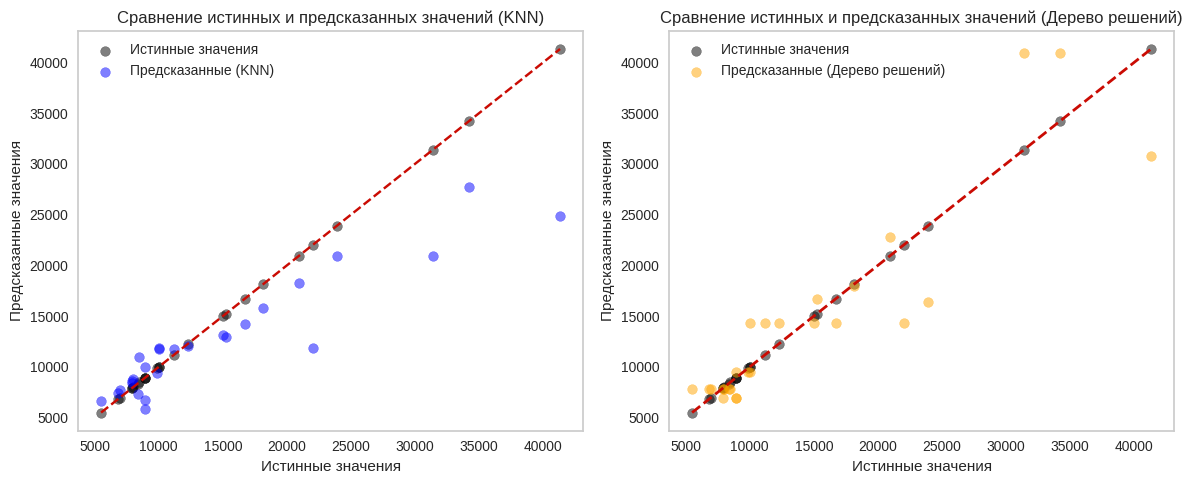

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test, color='black', label='Истинные значения', alpha=0.5)
plt.scatter(y_test, y_pred_knn, color='blue', label='Предсказанные (KNN)', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений (KNN)')
plt.legend(loc='upper left')
plt.grid()

# График Дерево решений
plt.subplot(1, 2, 2)  # 1 ряд, 2 колонки, 2-й график
plt.scatter(y_test, y_test, color='black', label='Истинные значения', alpha=0.5)
plt.scatter(y_test, y_pred_tree, color='orange', label='Предсказанные (Дерево решений)', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений (Дерево решений)')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()


Визуально модели слабо отличаются, но на основе метрик, посчитанных ранее, можно сделать вывод, что модель дерева решений демонстрирует более высокую точность и лучшую производительность по сравнению с моделью KNN. Дерево решений имеет меньшие ошибки и объясняет большую часть вариации в данных. Это может свидетельствовать о том, что в данной задаче дерево решений более эффективно.

# Вывод

В ходе выполнения данной лабораторной работы были приобретены навыки для построения и анализа различных видов регрессий.
<br><br>
Выполнение заданий позволило приобрести практические навыки для работы с линейной регрессией: был изучен пренцип деления датафреймп на тренировочную и валидационную группу для дальнейшего обучения и проверки модели. Для деления на данные группы необходимо было указывать различные параметры: параметр отношения деления (в работе было выбрано отношение 3 к 1), количество перемешиваний набора данных в датафрейме и другие. Далее была обучена модель для предсказания будущих значений с помощью тренировоного набора данных. Для анализа полученной регрессии были вычислены различные параметры, характеризующие ее, например, R2, который мог принмать значения от 0 до 1 и чем ближе было это значение к 1, тем более успешна была обучена модель. Далее для полученной регрессии был построен график, помогавший понять суть регрессии и правильность ее реализации. Для построения графика были получены коэффициенты и свободные члены для линейной зависимости.
<br><br>
Линейная регрессия была протестирована на небольшом наборе данных и показала основные метрики, которые указывают на её ограниченную способность предсказывать зависимую переменную. Отрицательное значение R² свидетельствует о том, что модель не способна хорошо описывать данные.
<br><br>
Полиномиальная регрессия также тестировалась на небольшом наборе данных и продемонстрировала улучшение метрик по сравнению с линейной регрессией. Уменьшение MAE и повышение R² указывают на то, что модель лучше соответствует данным, но необходимо следить за возможным переобучением на более высоких степенях.
<br><br>
Дерево решений было протестировано на более крупном наборе данных и показало хорошую производительность. Значения MAE и RMSE указывают на высокую точность предсказаний, а R² около 0.80 свидетельствует о том, что модель хорошо объясняет вариацию данных.
<br><br>
KNN также продемонстрировал конкурентоспособные метрики на наборе из 250 строк. Хотя его производительность немного хуже, чем у дерева решений, R² около 0.73 показывает, что модель может объяснять значительную часть вариации в данных. Оптимальный выбор числа соседей (𝐾) остается ключевым фактором для достижения хороших результатов.
<br><br>
Выбор модели зависит от характеристик данных и желаемого уровня интерпретируемости. Полиномиальная регрессия была протестирована на меньших наборах, что могло ограничить её точность. Дерево решений показало наилучшие результаты среди всех моделей на более крупном наборе данных, с высоким значением R² и низкими ошибками.

### Дополнительное задание

Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN. Сравнить качество модели для подобранных параметров и любых других.
Для начала создается модель knn, содержит 3 параметры
- число ближайших соседей, которые будут использоваться для предсказания
- `weights`: определяет, как рассчитываются веса соседей (`uniform` означает равные веса для всех соседей, `distance` означает, что соседи, которые ближе, имеют больший вес).
- `p`:1 — манхэттенское расстояние, 2 — евклидово расстояние.

 Манхэттен -  расстояние между точками рассчитывается как сумма абсолютных разностей их координат.

 Евклид - расстояние рассчитывается как квадратный корень из суммы квадратов разностей координат, что является стандартной мерой расстояния в пространстве.


 Далее считаются метрики модели, затем метрики добавляются в датафрейм, которые будет использоваться для сравнения самостоятельно подобранных параметров с параметрами, которые подобраны с помощью GridSearchCV (рис. 22).

In [ ]:
knn_model_grid = KNeighborsRegressor()


param_grid = { 'n_neighbors': [3, 5, 7, 9, 11],  # количество соседей
                'weights': ['uniform', 'distance'],  # весовая схема
                'p': [1, 2]  # метрика расстояния: 1 - манхэттенское расстояние, 2 - евклидово расстояние
  }

grid_search = GridSearchCV(knn_model_grid, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)
y_pred_knn_grid = grid_search.best_estimator_.predict(X_test)

mae_knn_grid = metrics.mean_absolute_error(y_test, y_pred_knn_grid)
mse_knn_grid = metrics.mean_squared_error(y_test, y_pred_knn_grid)
rmse_knn_grid = np.sqrt(mse_knn)
r2_knn_grid = metrics.r2_score(y_test, y_pred_knn_grid)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)
metriks_knn = pd.DataFrame({'KNN (Ручной подбор)': [mae_knn, mse_knn, rmse_knn, r2_knn], 'KNN (Оптимальные параметры)': [mae_knn_grid, mse_knn_grid, rmse_knn_grid, r2_knn_grid]},
                       index=['MAE', 'MSE', 'RMSE', 'R^2'])
metriks_knn

Лучшие параметры: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


,KNN (Ручной подбор),KNN (Оптимальные параметры)
MAE,2967.76,2611.69
MSE,22873203.51,17565551.27
RMSE,4782.59,4782.59
R^2,0.73,0.79


После подбора параметров видно, что модель с оптимальными параметрами показала лучшие результаты по сравнению с моделью с ручным подбором. Средняя абсолютная ошибка (MAE) и среднеквадратичная ошибка (MSE) снизились, что указывает на более точные предсказания. Коэффициент детерминации (R^2) также возрос, отражая улучшение качества модели.